In [1]:
import pandas as pd
import numpy as np
# cleaning data 
import re
# for division
from operator import truediv
# to multiply all element in the list
from functools import reduce

In [2]:
# put the text line by line into list
with open('C:/Users/Acer/Downloads/pre-screen/text/poco.txt', 'r') as f:
    lines_list = [] # buant container kosong
    for line in f:
        lines_list.append(line.strip()) # line.strip 

In [3]:
# Removing unwanted symbols if exists
def cleaning_text(i):
    i = re.sub("[^A-Za-z" "]+"," ",i).lower() #buang punctuation
    i = re.sub("[0-9" "]+"," ",i)
    w = []
    for word in i.split(" "):
        if len(word)>3: # remove joint word
            w.append(word)
    return (" ".join(w))

In [4]:
lines_list2 = [cleaning_text(item) for item in  lines_list]

In [6]:
# Q1: count probability of the word 'data' occuring in each line
# count occurrence of 'data' in each line
nm = 'data'
occurences = [item.count(nm) for item in  lines_list2]
count = sum(occurences)
#print(occurences) # This will print out all occurences of input string
#print('count = ', count) 
# count total words in each line
total_word = []
for x,word in enumerate(lines_list2):
    num = (len(word.split()))
    total_word.append(num)
# probability of word 'data' occuring in each line
prob = list(map(truediv, occurences, total_word))
print ("The probability of of the word “data” occurring for each line is : " + str(prob))

The probability of of the word “data” occurring for each line is : [0.1, 0.0, 0.0, 0.09090909090909091, 0.1, 0.1, 0.1, 0.0, 0.0, 0.1111111111111111, 0.0, 0.1, 0.16666666666666666, 0.2222222222222222, 0.1111111111111111, 0.0, 0.18181818181818182, 0.2, 0.1, 0.0, 0.09090909090909091, 0.0]


In [7]:
# Q2: Frequency distribution of unique words
import nltk
# join into paragraph
paragraph = " ".join(lines_list2)
nltk.download('punkt')
words = nltk.tokenize.word_tokenize(paragraph)
fdist1 = nltk.FreqDist(words)
filtered_word_freq = dict((word, freq) for word, freq in fdist1.items() if not word.isdigit())
print(filtered_word_freq)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


{'term': 3, 'data': 18, 'analytics': 10, 'predominantly': 1, 'refers': 1, 'assortment': 1, 'applications': 1, 'from': 2, 'basic': 1, 'business': 4, 'intelligence': 1, 'reporting': 1, 'online': 1, 'analytical': 1, 'processing': 1, 'olap': 1, 'various': 1, 'forms': 1, 'advanced': 2, 'that': 5, 'sense': 1, 'similar': 1, 'nature': 1, 'another': 1, 'umbrella': 1, 'approaches': 1, 'analyzing': 1, 'with': 3, 'difference': 1, 'latter': 1, 'oriented': 1, 'uses': 2, 'while': 2, 'broader': 1, 'focus': 1, 'expansive': 1, 'view': 2, 'universal': 1, 'though': 1, 'some': 1, 'cases': 1, 'people': 1, 'specifically': 1, 'mean': 1, 'treating': 1, 'separate': 1, 'category': 1, 'initiatives': 1, 'help': 1, 'businesses': 1, 'increase': 1, 'revenues': 1, 'improve': 1, 'operational': 1, 'efficiency': 1, 'optimize': 1, 'marketing': 1, 'campaigns': 1, 'customer': 1, 'service': 1, 'efforts': 1, 'respond': 1, 'more': 2, 'quickly': 1, 'emerging': 1, 'market': 1, 'trends': 1, 'gain': 1, 'competitive': 1, 'edge': 1,

<BarContainer object of 160 artists>

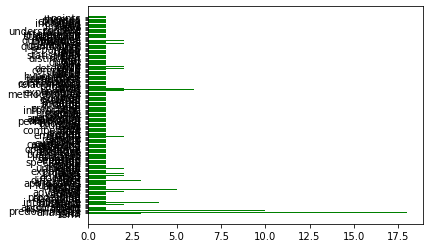

In [8]:
# frequency distribution of words
import matplotlib.pyplot as plt
plt.barh([ str(i) for i in filtered_word_freq.keys()], filtered_word_freq.values(), color='g')

In [9]:
# Q3: probability of 'analytics' occurring given 'data'occurred in paragraph
# Bayes theorem --> conditional probability
paragraph = str.split(paragraph)
tot_word = 0
count_d = 0
count_a = 0
for lines in  paragraph:
    tot_word = tot_word + 1
    if lines == 'data':
        count_d = count_d + 1
    if lines == 'analytics':
        count_a = count_a + 1
prob_data = count_d / tot_word
prob_analytics = count_a / tot_word
print('P(analytics_given_data):',(prob_data*prob_analytics)/prob_data)

P(analytics_given_data): 0.04672897196261682
